In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt

In [4]:
#Loading latest available datafile
c1= pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/6fadff46-9efd-4c53-942a-54aca783c30c", sep=";", parse_dates=["jour"])
c1


,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad
0,01,2020-03-19,1,0,0,0
1,01,2020-03-20,0,0,0,1
2,01,2020-03-21,3,0,0,0
3,01,2020-03-22,3,1,0,1
4,01,2020-03-23,14,1,0,5
...,...,...,...,...,...,...
25245,976,2020-11-19,1,1,0,2
25246,976,2020-11-20,1,0,0,0
25247,976,2020-11-21,1,0,0,2
25248,976,2020-11-22,0,0,0,0


In [5]:
#Using file to match department numbers to department names available at https://www.data.gouv.fr/fr/datasets/departements-de-france/
cdep= pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/70cef74f-70b1-495a-8500-c089229c0254", sep=",")
cdep


,code_departement,nom_departement,code_region,nom_region
0,01,Ain,84,Auvergne-Rhône-Alpes
1,02,Aisne,32,Hauts-de-France
2,03,Allier,84,Auvergne-Rhône-Alpes
3,04,Alpes-de-Haute-Provence,93,Provence-Alpes-Côte d'Azur
4,05,Hautes-Alpes,93,Provence-Alpes-Côte d'Azur
...,...,...,...,...
96,971,Guadeloupe,1,Guadeloupe
97,972,Martinique,2,Martinique
98,973,Guyane,3,Guyane
99,974,La Réunion,4,La Réunion


In [7]:
#Matching files on departement and creating new column with names fused together
cmu=pd.merge(c1, cdep, left_on="dep", right_on="code_departement", how="left")
cmu["dep1"]=cmu["dep"]+ " - "+cmu["nom_departement"]
cmu.sort_values("nom_departement").head(300).groupby("dep1")
cmu.head()

,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad,code_departement,nom_departement,code_region,nom_region,dep1
0,01,2020-03-19,1,0,0,0,01,Ain,84,Auvergne-Rhône-Alpes,01 - Ain
1,01,2020-03-20,0,0,0,1,01,Ain,84,Auvergne-Rhône-Alpes,01 - Ain
2,01,2020-03-21,3,0,0,0,01,Ain,84,Auvergne-Rhône-Alpes,01 - Ain
3,01,2020-03-22,3,1,0,1,01,Ain,84,Auvergne-Rhône-Alpes,01 - Ain
4,01,2020-03-23,14,1,0,5,01,Ain,84,Auvergne-Rhône-Alpes,01 - Ain


In [10]:
#Creating a new table with jour changed for the Monday equivalent of that week
c2= cmu.groupby(["dep1", pd.Grouper(key="jour", freq='W-Mon', label='left',closed='left')])["incid_hosp"].sum().reset_index().sort_values("jour")
c2

,dep1,jour,incid_hosp
0,01 - Ain,2020-03-16,7
222,07 - Ardèche,2020-03-16,22
1036,2A - Corse-du-Sud,2020-03-16,78
2701,73 - Savoie,2020-03-16,24
1739,47 - Lot-et-Garonne,2020-03-16,5
...,...,...,...
480,13 - Bouches-du-Rhône,2020-11-23,37
1442,38 - Isère,2020-11-23,57
2293,61 - Orne,2020-11-23,9
1775,47 - Lot-et-Garonne,2020-11-23,5


In [11]:
#Creating a new column with the week number equivalent for the day associated to it
#A little hack as there is a weird discrepancy on how weeks are matching days so I am adding a week to the calculation
c2["Weekdate2"]= (c2['jour'] + pd.to_timedelta(7, unit='d')).dt.strftime('%W')
c2

,dep1,jour,incid_hosp,Weekdate2
0,01 - Ain,2020-03-16,7,12
222,07 - Ardèche,2020-03-16,22,12
1036,2A - Corse-du-Sud,2020-03-16,78,12
2701,73 - Savoie,2020-03-16,24,12
1739,47 - Lot-et-Garonne,2020-03-16,5,12
...,...,...,...,...
480,13 - Bouches-du-Rhône,2020-11-23,37,48
1442,38 - Isère,2020-11-23,57,48
2293,61 - Orne,2020-11-23,9,48
1775,47 - Lot-et-Garonne,2020-11-23,5,48


In [13]:
#adding a column which is the date of the last day of the week for jour
#reformating the day to shorten its description
c2["Weekend"]=(c2['jour'] + pd.to_timedelta(6, unit='d')).dt.strftime('%m-%d')
c2["jourS"]=c2['jour'].dt.strftime('%m-%d')
c2

,dep1,jour,incid_hosp,Weekdate2,Weekend,jourS
0,01 - Ain,2020-03-16,7,12,03-22,03-16
222,07 - Ardèche,2020-03-16,22,12,03-22,03-16
1036,2A - Corse-du-Sud,2020-03-16,78,12,03-22,03-16
2701,73 - Savoie,2020-03-16,24,12,03-22,03-16
1739,47 - Lot-et-Garonne,2020-03-16,5,12,03-22,03-16
...,...,...,...,...,...,...
480,13 - Bouches-du-Rhône,2020-11-23,37,48,11-29,11-23
1442,38 - Isère,2020-11-23,57,48,11-29,11-23
2293,61 - Orne,2020-11-23,9,48,11-29,11-23
1775,47 - Lot-et-Garonne,2020-11-23,5,48,11-29,11-23


In [14]:
#doing a little hack for formating of the last columns which will be used for the graph
space=" "
c2["Weekful"]=c2['jourS'].astype(str) +space+ c2["Weekend"].astype(str)
c2["Weel"]=space*2+c2["Weekdate2"]+space*2+c2["Weekful"]
c2

,dep1,jour,incid_hosp,Weekdate2,Weekend,jourS,Weekful,Weel
0,01 - Ain,2020-03-16,7,12,03-22,03-16,03-16 03-22,12 03-16 03-22
222,07 - Ardèche,2020-03-16,22,12,03-22,03-16,03-16 03-22,12 03-16 03-22
1036,2A - Corse-du-Sud,2020-03-16,78,12,03-22,03-16,03-16 03-22,12 03-16 03-22
2701,73 - Savoie,2020-03-16,24,12,03-22,03-16,03-16 03-22,12 03-16 03-22
1739,47 - Lot-et-Garonne,2020-03-16,5,12,03-22,03-16,03-16 03-22,12 03-16 03-22
...,...,...,...,...,...,...,...,...
480,13 - Bouches-du-Rhône,2020-11-23,37,48,11-29,11-23,11-23 11-29,48 11-23 11-29
1442,38 - Isère,2020-11-23,57,48,11-29,11-23,11-23 11-29,48 11-23 11-29
2293,61 - Orne,2020-11-23,9,48,11-29,11-23,11-23 11-29,48 11-23 11-29
1775,47 - Lot-et-Garonne,2020-11-23,5,48,11-29,11-23,11-23 11-29,48 11-23 11-29


In [15]:
#Pivoting the table on the values needed
C3= c2.pivot("dep1", "Weel", "incid_hosp")
C3

Weel,12 03-16 03-22,13 03-23 03-29,14 03-30 04-05,15 04-06 04-12,16 04-13 04-19,17 04-20 04-26,18 04-27 05-03,19 05-04 05-10,20 05-11 05-17,21 05-18 05-24,...,39 09-21 09-27,40 09-28 10-04,41 10-05 10-11,42 10-12 10-18,43 10-19 10-25,44 10-26 11-01,45 11-02 11-08,46 11-09 11-15,47 11-16 11-22,48 11-23 11-29
dep1,,,,,,,,,,,,,,,,,,,,,
01 - Ain,7,84,164,86,121,54,36,23,26,12,...,27,23,20,52,166,207,274,249,184,16
02 - Aisne,91,158,274,208,98,299,79,103,66,23,...,19,25,23,56,85,105,151,122,105,13
03 - Allier,11,44,49,40,19,28,7,11,3,17,...,22,12,28,66,97,143,166,153,131,13
04 - Alpes-de-Haute-Provence,2,26,46,25,20,23,6,2,4,2,...,11,8,8,16,25,62,79,95,83,8
05 - Hautes-Alpes,12,39,40,15,11,12,6,5,1,2,...,6,14,11,28,72,162,97,82,139,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971 - Guadeloupe,6,49,33,21,7,5,2,0,0,0,...,162,141,102,67,56,40,36,20,17,1
972 - Martinique,4,58,28,5,8,6,2,1,1,0,...,16,12,31,31,28,36,45,34,22,2
973 - Guyane,0,0,15,15,7,5,2,6,8,21,...,23,27,21,13,20,23,16,11,6,7


In [17]:
#creating a new colorscale which has a green yellow red black grading
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
bottom = cm.get_cmap('hot_r', 128)
top = cm.get_cmap('summer', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 10)),
                       bottom(np.linspace(0.2, 1, 128))))


newcmp = ListedColormap(newcolors, name='Stoplights')

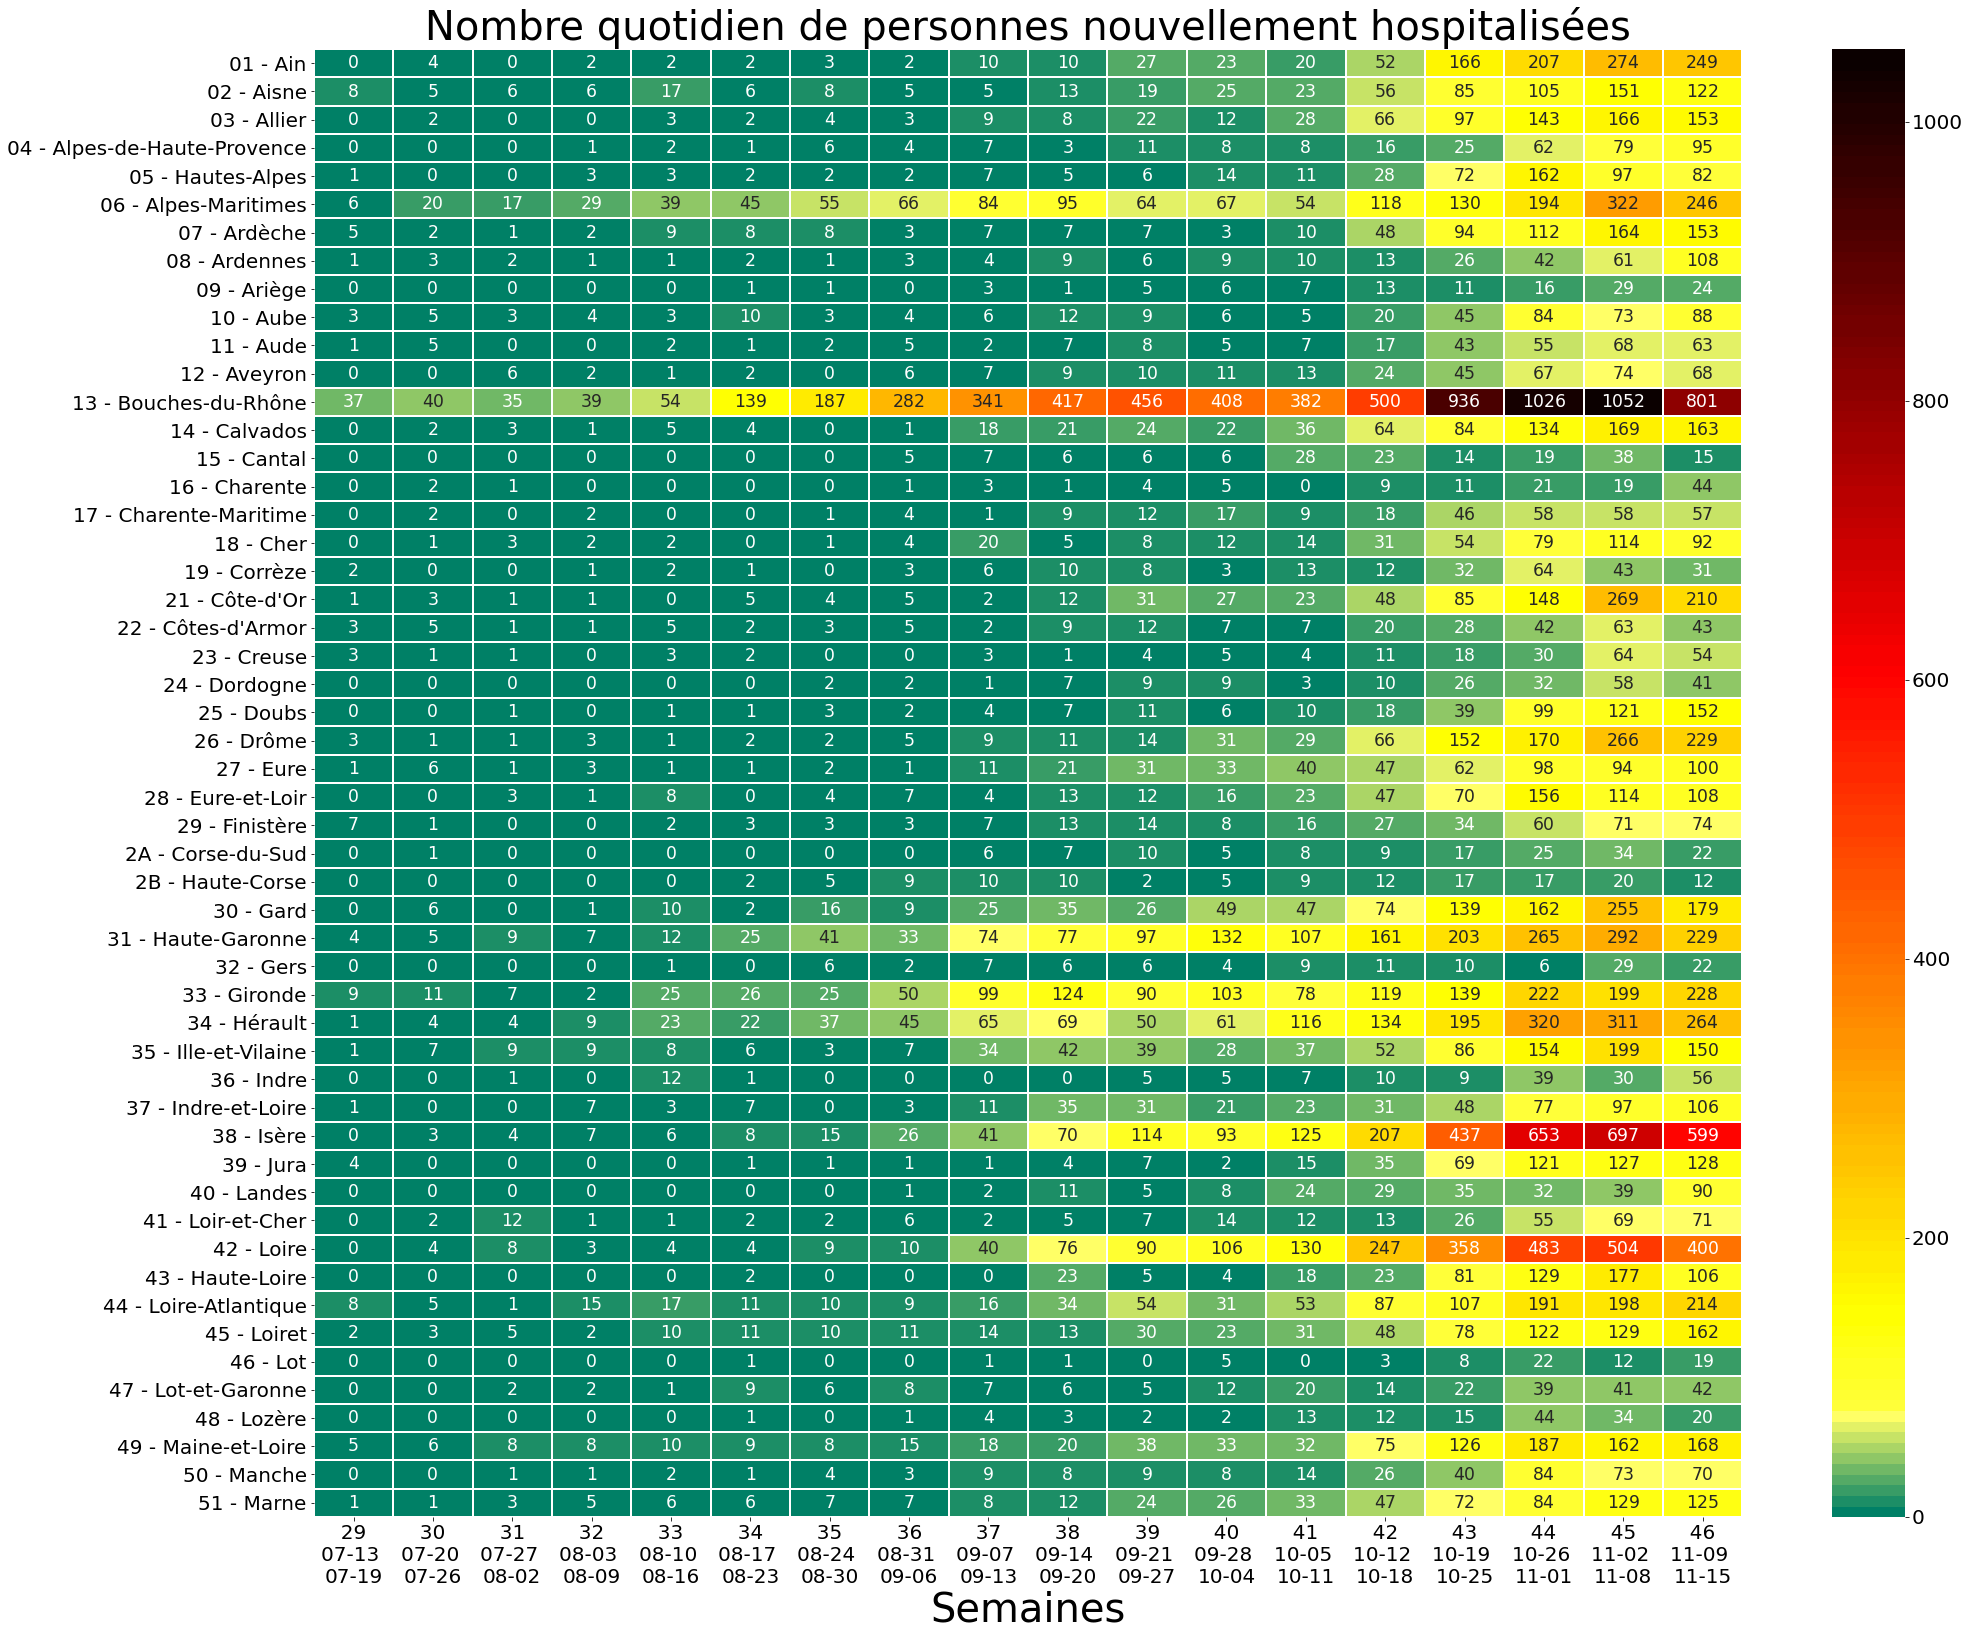

In [59]:
#Making the graphs with display options, split to the end of the last available week and the 20 previous weeks

plt.figure(figsize=(32,27))
plt.yticks(fontsize=20)
plt.title("Nombre quotidien de personnes nouvellement hospitalisées", fontsize=40);
annot_kws={'fontsize':"xx-large"}
ax= sns.heatmap(C3.iloc[:52,-20:-2], cmap=newcmp, annot=True, annot_kws=annot_kws, fmt='g',linewidths=1)
ax.set_xlabel("Semaines", fontsize=40 )
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
ax.set_ylabel("")
#hack to display labels horizontally
max_chars = 6
new_labels = ['\n'.join(label._text[i:i + max_chars ]
                      for i in range(0, len(label._text), max_chars ))
              for label in ax.get_xticklabels()];
ax.set_xticklabels(new_labels, rotation=0, fontsize=20);



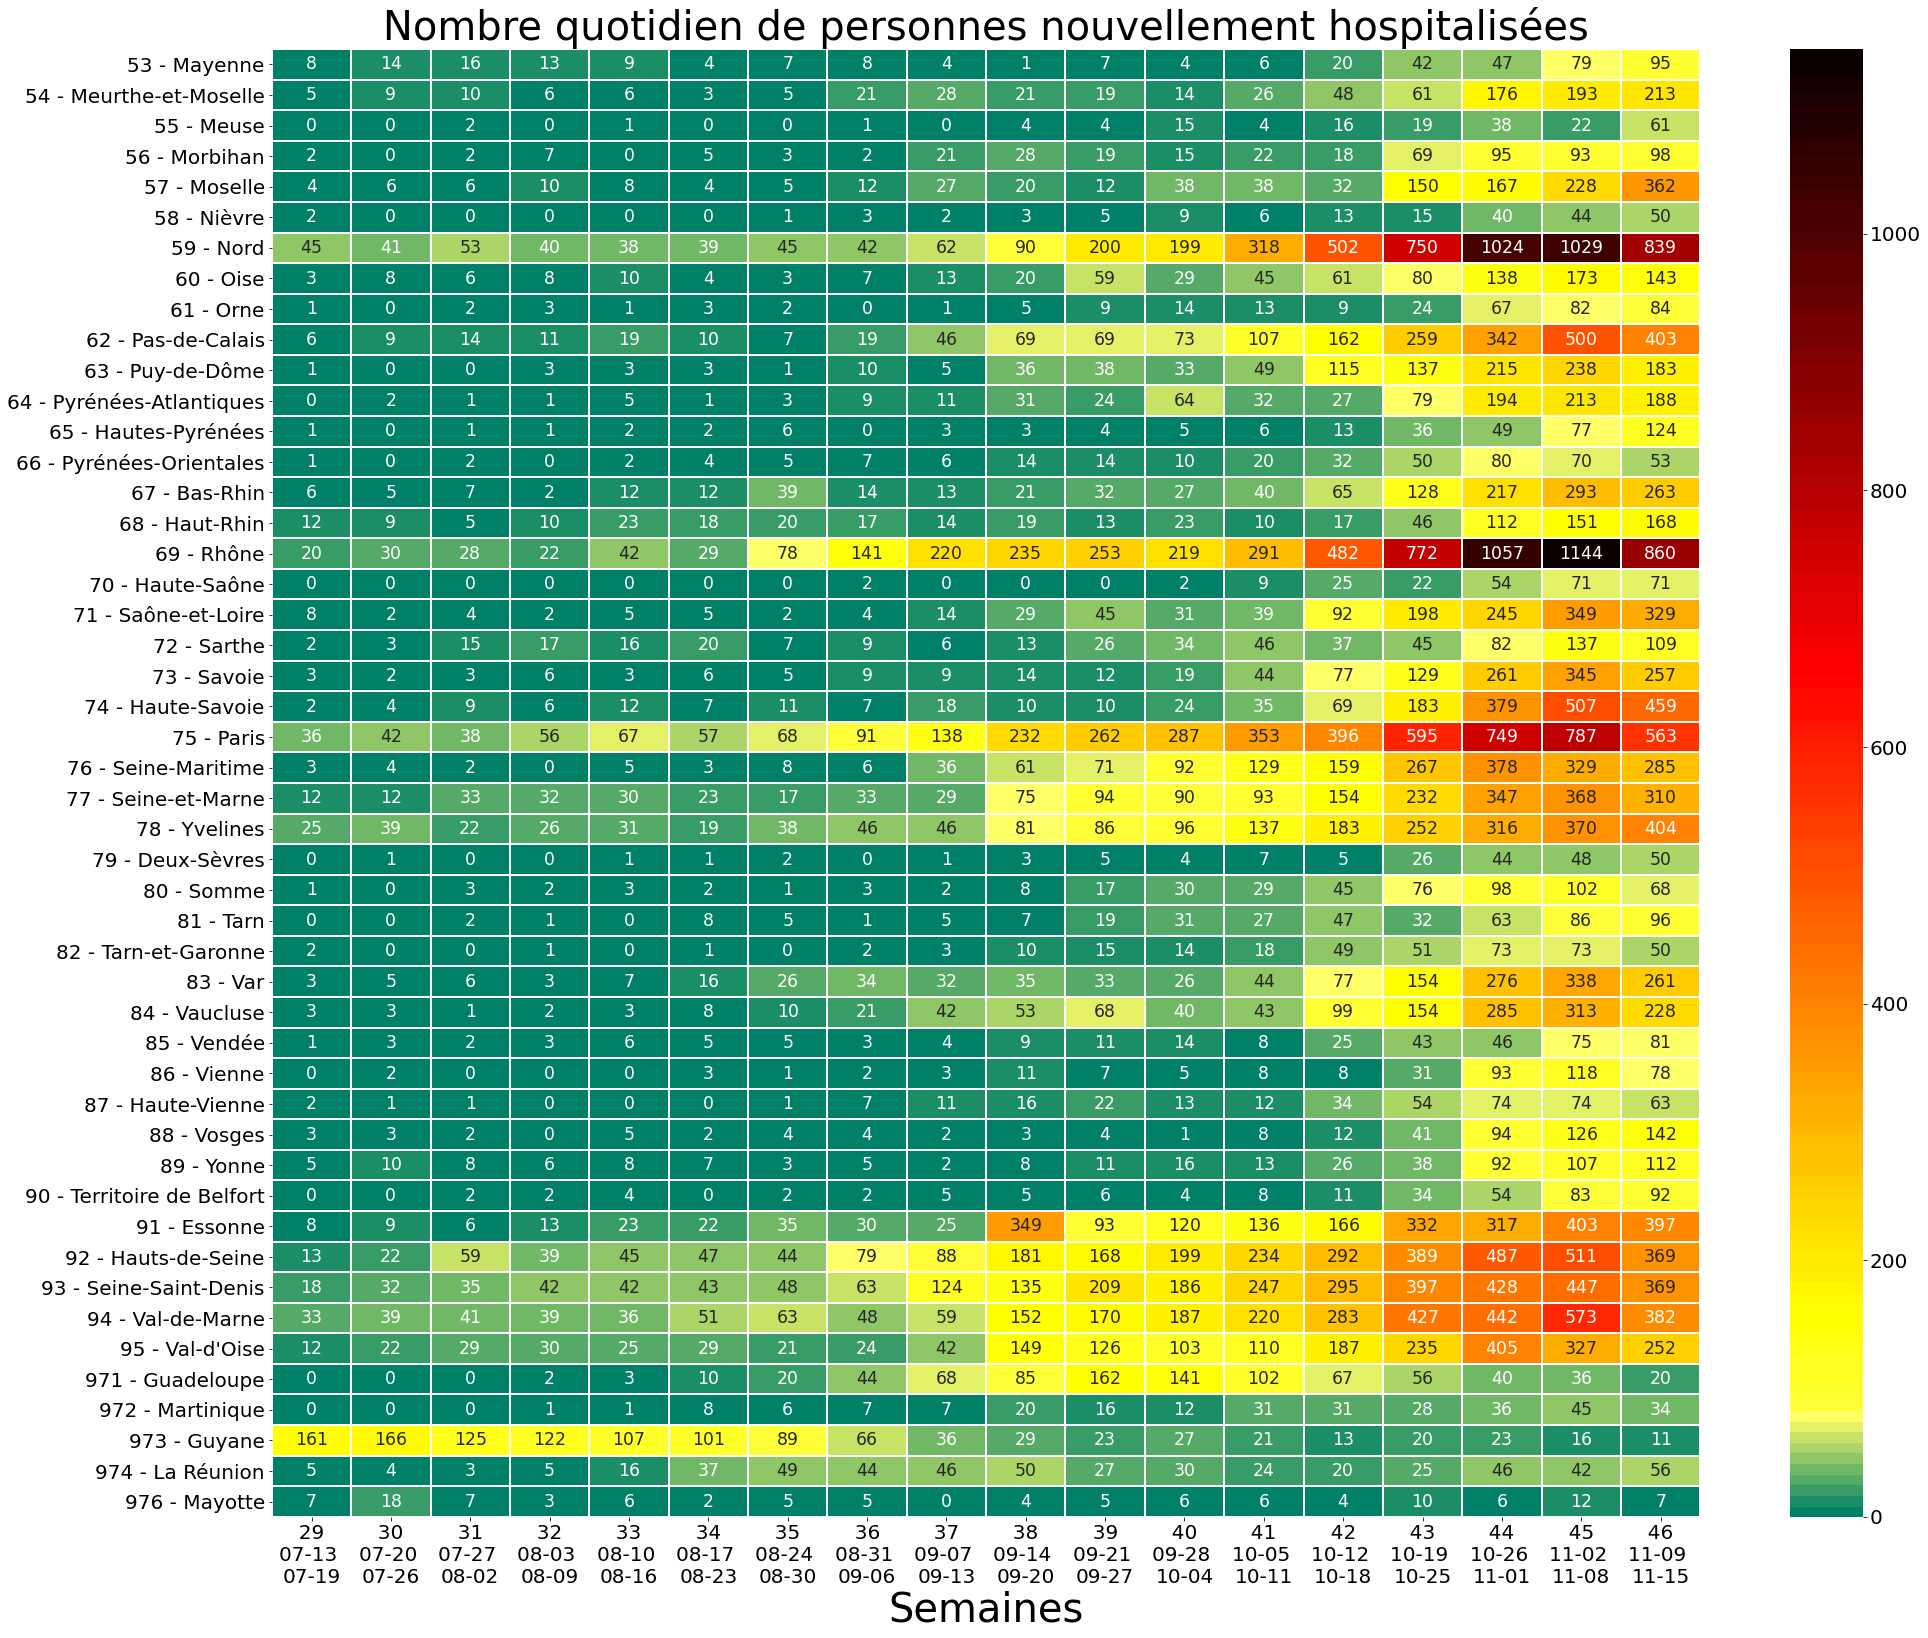

In [60]:
#Other half of the data, split to the end of the last available week and the 20 previous weeks


plt.figure(figsize=(32,27))
plt.title("Nombre quotidien de personnes nouvellement hospitalisées", fontsize=40);
plt.yticks(fontsize=20)
annot_kws={'fontsize':"xx-large"}
ax= sns.heatmap(C3.iloc[53:,-20:-2], cmap=newcmp, annot=True, annot_kws=annot_kws, fmt='g',linewidths=1)
ax.set_xlabel("Semaines", fontsize=40 )
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
ax.set_ylabel("")
#hack to display labels horizontally
max_chars = 6
new_labels = ['\n'.join(label._text[i:i + max_chars ] 
                      for i in range(0, len(label._text), max_chars ))
              for label in ax.get_xticklabels()];
ax.set_xticklabels(new_labels, rotation=0, fontsize=20);
